In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime as dt
from sklearn.model_selection import train_test_split


In [3]:
Rtl_data=pd.read_csv('OnlineRetail.csv',encoding='unicode_escape')
Rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
Rtl_data.shape

(541909, 8)

In [6]:
df=Rtl_data.copy()

In [9]:
print('Duplicate entries:{}'.format(df.duplicated().sum()))
print('{}% rows are duplicate'.format(round((df.duplicated().sum()/df.shape[0])*100),2))


Duplicate entries:5268
1% rows are duplicate


In [10]:
#Removing duplicates:
df.drop_duplicates(inplace=True)

In [11]:
#Checking total number of products,transactions and customers
pd.DataFrame([{'products':len(df['StockCode'].value_counts()),
             'transactions':len(df['InvoiceNo'].value_counts()),
             'customers':len(df['CustomerID'].value_counts())}],columns=['products', 'transactions', 'customers'],index=['quantity'])

,products,transactions,customers
quantity,4070,25900,4372


In [15]:
#Customer distribution by country
country_data=df[['Country','CustomerID']].drop_duplicates()
country_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [33]:
#Countrywise distribution of transaction
temp=df.groupby(['Country'],as_index=False).agg({'InvoiceNo':'nunique'}).rename(columns={'InvoiceNo':'Orders'})
total=temp['Orders'].sum(axis=0)
temp['% Orders']=round((temp['Orders']/total)*100,2)

In [34]:
temp.sort_values(by=['Orders'],ascending=False,inplace=True)

In [36]:
temp.reset_index(drop=True,inplace=True)

In [37]:
temp

,Country,Orders,% Orders
0,United Kingdom,23494,90.71
1,Germany,603,2.33
2,France,461,1.78
3,EIRE,360,1.39
4,Belgium,119,0.46
5,Spain,105,0.41
6,Netherlands,101,0.39
7,Switzerland,74,0.29
8,Portugal,71,0.27
9,Australia,69,0.27


Text(0, 0.5, '% Orders')

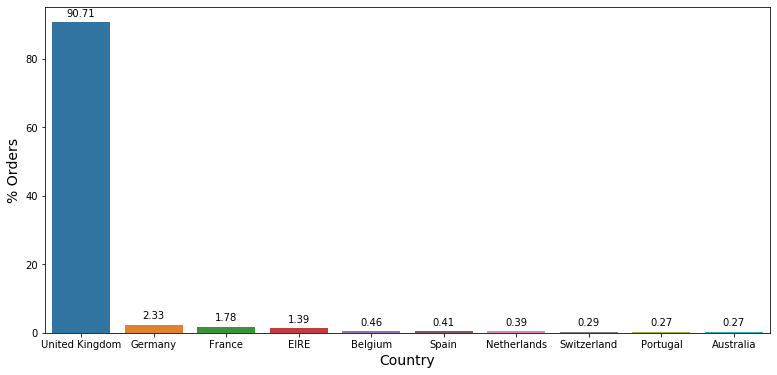

In [39]:
#Visualization of percentage of orders from top 10 countries
plt.figure(figsize=(13,6))
splot=sns.barplot(x="Country",y="% Orders",data=temp[:10])
for p in splot.patches:
    splot.annotate(format(p.get_height(),'.2f'),
                  (p.get_x()+p.get_width()/2.,p.get_height()),
                   ha='center',va='center',
                   xytext=(0,9),
                   textcoords='offset points')
plt.xlabel("Country",size=14)
plt.ylabel("% Orders",size=14)

The above graph shows the percentage of orders from the top 10 countries, sorted by the number of orders. This shows that more than 90% of orders are coming from United Kingdom and no other country even makes up 3% of the orders in the data.

In [44]:
#Keep only United Kingdom Data
df_UK=df[df.Country=='United Kingdom']

Let us now look at the number of canceled orders in the data. As per the data, if the invoice number code starts with the letter ‘c’, it indicates a canceled order.

In [46]:
invoices=df_UK['InvoiceNo']

In [47]:
x=invoices.str.contains('C',regex=True)
x.fillna(0,inplace=True)

In [48]:
x=x.astype(int)

In [49]:
x.value_counts()

0    482479
1      7821
Name: InvoiceNo, dtype: int64

In [54]:
df_UK['order_canceled'] = x
df_UK.head()


C:\Users\91999\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,0


In [56]:
#Let us remove the cancelled Orders
df_UK=df_UK.loc[df_UK['order_canceled']==0,:]

In [57]:
df_UK

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,09-12-2011 12:31,1.95,15804.0,United Kingdom,0
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,09-12-2011 12:49,2.95,13113.0,United Kingdom,0
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,09-12-2011 12:49,1.25,13113.0,United Kingdom,0
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,09-12-2011 12:49,8.95,13113.0,United Kingdom,0


In [58]:
df_UK.isnull().sum()

InvoiceNo              0
StockCode              0
Description         1454
Quantity               0
InvoiceDate            0
UnitPrice              0
CustomerID        133252
Country                0
order_canceled         0
dtype: int64

In [59]:
#Remove missing values from CustomerID column, can ignore missing values in description column
df_UK = df_UK[pd.notnull(df_UK['CustomerID'])]


In [60]:
df_UK.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
order_canceled    0
dtype: int64

In [61]:
#Validate if there are any negative values in Quantity column
df_UK.Quantity.min()


1

In [62]:
df_UK

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,09-12-2011 12:31,1.95,15804.0,United Kingdom,0
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,09-12-2011 12:49,2.95,13113.0,United Kingdom,0
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,09-12-2011 12:49,1.25,13113.0,United Kingdom,0
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,09-12-2011 12:49,8.95,13113.0,United Kingdom,0


In [64]:
pd.DataFrame([{'products': len(df_UK['StockCode'].value_counts()),    
               'transactions': len(df_UK['InvoiceNo'].value_counts()),
               'customers': len(df_UK['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])


,products,transactions,customers
quantity,3645,16649,3921


In [66]:
df_UK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349227 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InvoiceNo       349227 non-null  object 
 1   StockCode       349227 non-null  object 
 2   Description     349227 non-null  object 
 3   Quantity        349227 non-null  int64  
 4   InvoiceDate     349227 non-null  object 
 5   UnitPrice       349227 non-null  float64
 6   CustomerID      349227 non-null  float64
 7   Country         349227 non-null  object 
 8   order_canceled  349227 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 25.3+ MB


In [67]:
#Convert the string date field to datetime 
df_UK['InvoiceDate']=pd.to_datetime(df_UK['InvoiceDate'])

C:\Users\91999\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
#Add a new column total Amount
df_UK['TotalAmount']=df_UK['Quantity']*df_UK['UnitPrice']

C:\Users\91999\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
df_UK.shape


(349227, 10)

In [76]:
#Lets remove order cancelled as it is ofno use now
df_UK=df_UK.drop('order_canceled',axis=1)

In [78]:
df_UK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349227 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349227 non-null  object        
 1   StockCode    349227 non-null  object        
 2   Description  349227 non-null  object        
 3   Quantity     349227 non-null  int64         
 4   InvoiceDate  349227 non-null  datetime64[ns]
 5   UnitPrice    349227 non-null  float64       
 6   CustomerID   349227 non-null  float64       
 7   Country      349227 non-null  object        
 8   TotalAmount  349227 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 26.6+ MB


In [72]:
df_UK['InvoiceDate'].max()

Timestamp('2011-12-10 17:19:00')

In [69]:
df_UK['InvoiceDate'].min()

Timestamp('2010-01-12 08:26:00')

In [96]:
#Set Latest date 2011-12-11 as last invoice date was 2011-12-10. This is to calculate the number of days from recent purchase
Latest_date=dt.datetime(2011,12,11)
Latest_date

datetime.datetime(2011, 12, 11, 0, 0)

In [97]:
#Create RFM Modelling scores for each customer
RFMscores=df_UK.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})
                                           

In [98]:
#Convert Invoice Date into type int
RFMscores['InvoiceDate'] = RFMscores['InvoiceDate'].astype(int)

#Rename column names to Recency,Frequency and Monetary
RFMscores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

In [99]:
RFMscores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,23,103,4196.01
2,12748.0,5,4413,33053.19
3,12749.0,23,199,4090.88
4,12820.0,45,59,942.34


In [107]:
df_UK[df_UK['CustomerID']==12747]['InvoiceDate'].max()

Timestamp('2011-11-17 17:13:00')

In [110]:
RFMscores.Recency.describe()

count    3921.000000
mean      105.586585
std       115.044919
min         0.000000
25%        22.000000
50%        61.000000
75%       162.000000
max       697.000000
Name: Recency, dtype: float64

In [112]:
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(RFMscores['Recency'], 4, labels = r_labels)
RFMscores = RFMscores.assign(R = r_quartiles.values)

f_labels = range(1,5)
m_labels = range(1,5)
f_quartiles = pd.qcut(RFMscores['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(RFMscores['Monetary'], 4, labels = m_labels)
RFMscores = RFMscores.assign(F = f_quartiles.values)
RFMscores = RFMscores.assign(M = m_quartiles.values)
RFMscores.head()


,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,4
12747.0,23,103,4196.01,3,4,4
12748.0,5,4413,33053.19,4,4,4
12749.0,23,199,4090.88,3,4,4
12820.0,45,59,942.34,3,3,3


In [133]:
cols=['R','F','M']
RFMscores[cols]=RFMscores[cols].astype('category')

In [134]:
def join_rfm(x):
    return str(x['R'])+str(x['F'])+str(x['M'])

RFMscores['RFM_Segment'] = RFMscores.apply(join_rfm, axis=1)
RFMscores['RFM_Score'] = RFMscores[['R','F','M']].sum(axis=1)

In [135]:
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12747.0,23,103,4196.01,3,4,4,344,11
12748.0,5,4413,33053.19,4,4,4,444,12
12749.0,23,199,4090.88,3,4,4,344,11
12820.0,45,59,942.34,3,3,3,333,9


In [136]:
RFMscores.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3921 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Recency      3921 non-null   int32   
 1   Frequency    3921 non-null   int64   
 2   Monetary     3921 non-null   float64 
 3   R            3921 non-null   category
 4   F            3921 non-null   category
 5   M            3921 non-null   category
 6   RFM_Segment  3921 non-null   object  
 7   RFM_Score    3921 non-null   int64   
dtypes: category(3), float64(1), int32(1), int64(2), object(1)
memory usage: 180.4+ KB


In [138]:
RFMscores.groupby('RFM_Score').agg({'Recency': 'mean',
                                   'Frequency': 'mean',
                                   'Monetary': ['mean', 'count'] }).round(1)


Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3           287.0       7.9    149.2   325
4           199.2      13.9    228.2   352
5           167.7      21.0    344.8   480
6           117.8      28.1    629.4   449
7            97.1      39.1   1296.0   377
8            70.1      53.8   1016.8   426
9            56.6      77.5   1389.4   363
10           41.7     121.2   1881.1   400
11           25.5     186.7   4069.8   384
12           10.3     364.9   8128.2   365

In [140]:
def create_segment(df):
    if df['RFM_Score']>=9:
        return 'High'
    elif (df['RFM_Score']>=5) and (df['RFM_Score'] < 9):
        return 'Middle'
    else:
        return 'Low'
    
RFMscores['General_Segment']=RFMscores.apply(create_segment,axis=1)
RFMscores.groupby('General_Segment').agg({'Recency': 'mean',
                                         'Frequency': 'mean',
                                         'Monetary': ['mean', 'count']}).round(1)


Recency Frequency Monetary      
                   mean      mean     mean count
General_Segment                                 
High               33.6     186.2   3827.0  1512
Low               241.4      11.0    190.3   677
Middle            115.4      34.8    790.9  1732

### Preprocessing data for Clustering
In the next section, we are going to prepare the data for Kmeans clustering on RFM Score data. To do this, we need to preprocess the data so that it can meet the key assumptions of Kmeans algorithm, which are:

The varaiables should be distributed symmetrically
Variables should have similar average values
Variables should have similar standard deviation values

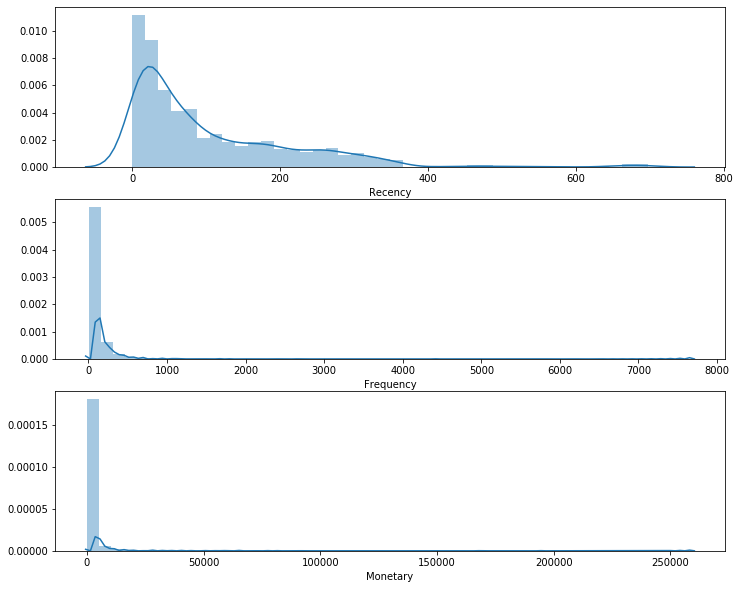

In [142]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))

# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(RFMscores['Recency'])

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(RFMscores['Frequency'])

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(RFMscores['Monetary'])

As we can see from the above plots, all the variables do not have a symmetrical distribution. All of them are skewed to the right. To remove the skewness, we can try log transformations

The log transformation cannot be used for negative values. One common practice one can use here is to add a constant value to get a positive value and this is generally taken as the absolute of the least negative value of the variable to each observation. However, in our data, we do not have any negative values since we are dealing with customer transactions dataset.



In [144]:
# Checking for constant mean and variance.
RFMscores[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,105.586585,89.065800,1857.950687
std,115.044919,214.022733,7477.736186
min,0.000000,1.000000,0.000000
25%,22.000000,17.000000,298.110000
50%,61.000000,40.000000,644.300000
75%,162.000000,98.000000,1570.810000
max,697.000000,7676.000000,259657.300000


In [145]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMscores['Recency'] = [handle_neg_n_zero(x) for x in RFMscores.Recency]
RFMscores['Monetary'] = [handle_neg_n_zero(x) for x in RFMscores.Monetary]


In [146]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_Data = RFMscores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

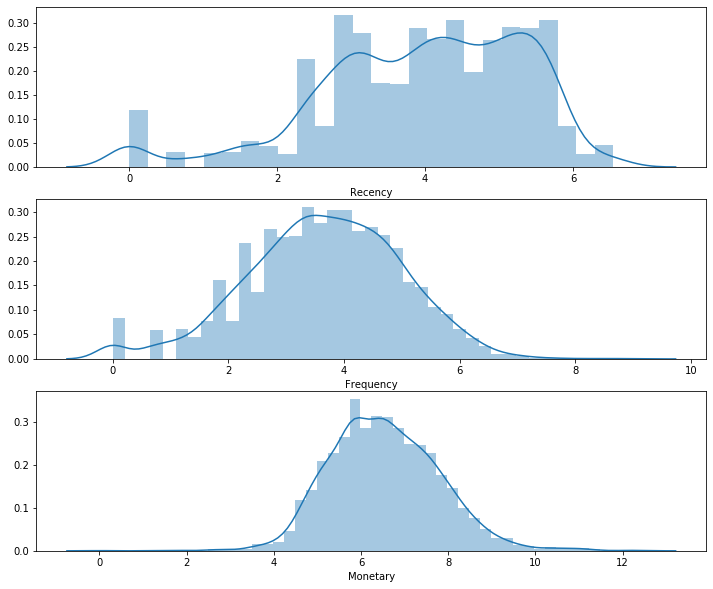

In [148]:
plt.figure(figsize=(12,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(Log_Data['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(Log_Data['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(Log_Data['Monetary'])

# Show the plot
plt.show()


In [152]:
#Standardize the data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(Log_Data)

#Transform it back to dataframe
scaled_data=pd.DataFrame(scaled_data,index=RFMscores.index,columns=Log_Data.columns)

In [153]:
scaled_data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.319459,-2.738851,3.768593
12747.0,-0.595765,0.736870,1.442565
12748.0,-1.697812,3.554192,3.091233
12749.0,-0.595765,1.230295,1.422596
12820.0,-0.110459,0.319184,0.249198
...,...,...,...
18280.0,0.805266,-1.011864,-1.070375
18281.0,-1.858859,-1.279573,-1.712589
18282.0,1.021920,-0.875385,-1.081558


In [154]:
# KMeans Clustering
from sklearn.cluster import KMeans

sse={}
for k in range(1,15):
    km=KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    km=km.fit(scaled_data)
    sse[k]=km.inertia_

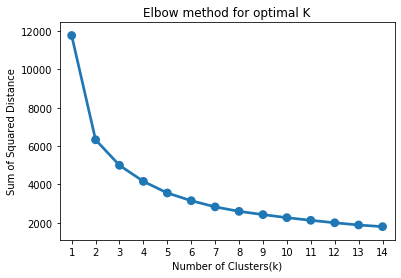

In [155]:
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Squared Distance')
plt.title('Elbow method for optimal K')
plt.show()

In [156]:
#Build KMeans Clustering model
KMean_clust=KMeans(n_clusters=3,init='k-means++',max_iter=1000)
KMean_clust.fit(scaled_data)

KMeans(max_iter=1000, n_clusters=3)

In [157]:
#Find the clusters for the observation in the given dataset
RFMscores['Cluster']=KMean_clust.labels_
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,General_Segment,Cluster
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Middle,2
12747.0,23,103,4196.01,3,4,4,344,11,High,1
12748.0,5,4413,33053.19,4,4,4,444,12,High,1
12749.0,23,199,4090.88,3,4,4,344,11,High,1
12820.0,45,59,942.34,3,3,3,333,9,High,2


<Figure size 720x720 with 0 Axes>

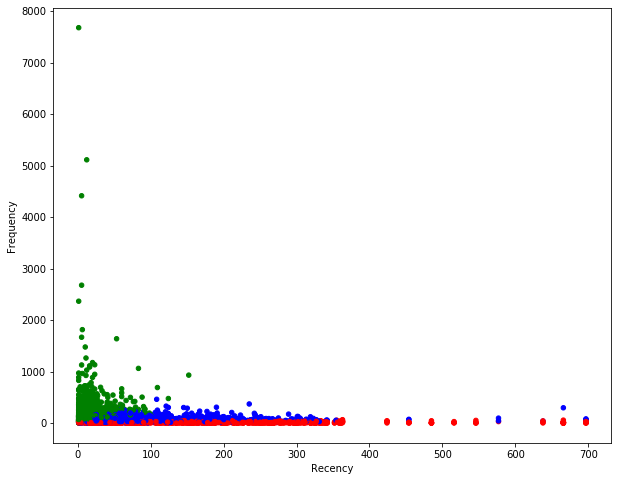

In [159]:
plt.figure(figsize=(10,10))
#Scatter plot Recency Vs Frequency
colors=['red','green','blue']
RFMscores['Color']=RFMscores['Cluster'].map(lambda x:colors[x])
ax=RFMscores.plot(kind='scatter',x='Recency',y='Frequency',figsize=(10,8),c=RFMscores['Color'])

In [160]:
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,General_Segment,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Middle,2,blue
12747.0,23,103,4196.01,3,4,4,344,11,High,1,green
12748.0,5,4413,33053.19,4,4,4,444,12,High,1,green
12749.0,23,199,4090.88,3,4,4,344,11,High,1,green
12820.0,45,59,942.34,3,3,3,333,9,High,2,blue
